# Part 2: Random forest and weather


### The aim here is to recreate the work you did in Part 1 and 2 of the Week 7 lecture. I've phrased things differently relative to the exercise to make the purpose more clear.
### Part 2A: Random forest binary classification.
###### Using the instructions and material from Week 7, build a random forest classifier to distinguish between two types (you choose) of crime using on spatio-temporal (where/when) features of data describing the two crimes. When you're done, you should be able to give the classifier a place and a time, and it should tell you which of the two types of crime happened there.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import svd
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

filename = 'Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv'
df = pd.read_csv(filename)

In [35]:
#Choosing the crimes: 
crimes= ["DRIVING UNDER THE INFLUENCE","DISORDERLY CONDUCT"]
df2=df[df.Category.isin(crimes)]

**Encoding labels**

In [36]:
le=LabelEncoder()

#Encoding the districts
df2["PdDistrict"]=df2["PdDistrict"].astype('str') #Changing the type to a string type
df2["PdDistrictNum"]= le.fit_transform(df2["PdDistrict"])

#Encoding the week days
df2["DayOfWeekNum"]= le.fit_transform(df2["DayOfWeek"])
#In that case, Monday:1 Tuesday:4 Wednseday:6 Thursday:5 Friday:0 Saturday:2 Sunday:3

#Encoding the hours (24h)
df2["Time"] = pd.to_datetime(df2["Time"])
df2['Time_hourNum'] = df2['Time'].dt.hour
#The hours go from 0 to 23 where 0 is midnight, 1 is 1:00... and 23 is 23:00

#Encoding the Crimes
df2["Category"]=df2["Category"].astype('str') #Changing the type to a string type
df2["CategoryNum"]= le.fit_transform(df2["Category"])

C:\Users\Miguel\Python\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Miguel\Python\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Miguel\Python\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [37]:
#Dataset for the to chosen crimes
d2concat=pd.concat([df2["DayOfWeekNum"],df2['Time_hourNum'],df2["PdDistrictNum"]],axis=1)

In [38]:
#Random Forest Classifier:
Element=df2["Category"] #Choose the element to predict based on the information you will give later

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(d2concat,Element, test_size =0.2)


from sklearn.ensemble import RandomForestClassifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

RandomForest= RandomForestClassifier(n_estimators=100)
RandomForest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [41]:
RandomForest.score(X_test,y_test) #Function that gives the accuracy of the model, with n_estimators=1000, the accuracy is ~73%

0.7394209354120267

**Test our classifier!**

Give it a Place and a time, and you will receive a prediction!

In [42]:
DayOfWeek=6    #Monday:1, Tuesday:4, Wednseday:6, Thursday:5, Friday:0, Saturday:2, Sunday:3
HourOfTheDay=16 #The hours go from 0 to 23 where 0 is midnight, 1 is 1:00... and 23 is 23:00
District=2      #BAYVIEW:0, CENTRAL:1, INGLESIDE:2, MISSION:3, NORTHERN:4, PARK:5, RICHMOND:6, SOUTHERN:7, TARAVAL:8, TENDERLOIN:9

#Prediction:
RandomForest.predict([[DayOfWeek,HourOfTheDay,District]])

array(['DISORDERLY CONDUCT'], dtype=object)

**Creation of Confusion matrix to check the validity of the model:**

In [12]:
y_predicted=RandomForest.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix
confusionmatrix= confusion_matrix(y_test,y_predicted)

Text(69,0.5,'Truth')

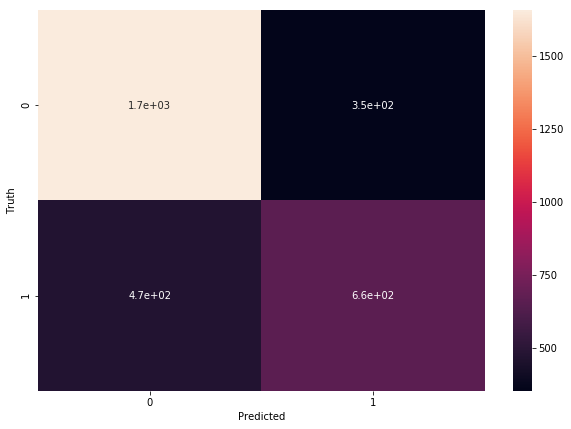

In [14]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(confusionmatrix,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
#In the plot belw, 0 stands for DISORDERLY CONDUCT and 1 for DRIVER UNDER INFLUENCE 

The confusion-matrix above is a specific table layout that allows visualization of the performance of an algorithm. 
It confronts the predicted values with the real ones for the tested data. A matching case (ex: 0 in x-axis and 0 in y-axis) indicates a succes in the prediction, and a non-matching one (ex: 1 in x-axis and 0 in y-axis) indicates a prediction failure.
Here we can see that our model performed really good for the DISORDERLY CONDUCT (which are represented by the number 0 in the matrix). Indeed, if we look at the case corresponding to Predicted and Truth for 0, we can see that its value is pretty high. 
However we can observe that there is some error remaining. In fact, the values of the cases that do not match a 1 with a 1 are about 25% of the total values. 
This corresponds to the accuracy rate of ~74% stated earlier.

###### Explain about your choices for training/test data, features, and encoding. (You decide how to present your results, but here are some example topics to consider: Did you balance the training data? What are the pros/cons of balancing? Do you think your model is overfitting? Did you choose to do cross-validation? Which specific features did you end up using? Why? Which features (if any) did you one-hot encode? Why ... or why not?))

In order to choose our training/test data, we looked at Assignment 1 to see which of the Crimes have the most different spatio-temporal patterns. 

<img src="Captureplot.PNG"/>

Indeed, the two categories we chose have noticeable different frequencies depending on the hour of the day as shown above, and it is also the case for the day of the week.

Moreover DISORDERLY CONDUCT can be assumed as dependent on the weather (due to it being an outdoor activity), thus we expect a change between the first and the second Random Forest. While DRIVING UNDER THE INFLUENCE since the number of motorist during the night roughtly depends on the weather. Thus it could be interesting to see how the second Random Forest where we include weather conditions differ from the first one.
By choosing two crimes with distinct frequency patters, it should be easier to classify them.

The choice of the features is linked to the choice of the two crimes we had to differenciate. Indeed, the features chosen are the ones for which we could observe differences in the crime categories. Thus the features choice should allow us to differentiate our two elements as best as possible.

For our model, 80% of the data has been taken for training and 20% for testing.

We could make the dataset 'balanced' by grabbing an equal number of examples from each crime category (we decided not to do so for the reasons mentionned below). 
The pros of balancing the dataset are that we will have the same number of observations for each category which leads to a fair comparison and avoids a situation where one element overpowers the other. However depending on the cut made in the dataset, this can lead to an analysis based in too few datapoints. We can take as example a comparison between 100 cases of DRIVING UNDER THE INFLUENCE and 1000 cases of DISORDERLY CONDUCT, by balacing the data we would only have 200 datapoints instead of 1100. It would be very limiting for our model.

Regarding the encoding, performing label encoding when working with the hours of the week also induces order/precedence in the numbers. This could create an unwanted bias but since we are dealing with hours, the numerical order is well suited, and allows a sense of continuity. 
However label encoding poses problems when working with other features such as week days or District due to precedence and unwanted order. That's why it would be better to work with one-hot encode for that kind of features. However due to data visualization issues we had to work only with label encoding.

Cross-Validation is one of the many existing techniques for the validation of a model. In our code, we used another validation method, the confusion matrix. One of the advantages of the confusion matrix is that it quickly shows whether a classification system manages to classify correctly.

### Report accuracy. Discuss the model performance.

The value for accuracy of the Random Forest Classifier is between 73 and 76%. This accuracy depends on the number of decision trees and which ones are used. In fact, since the Random Forest Classifier algorithm performs training on multiple decision trees trained on different subsets of data that are different every time, the accuracy will never be exactly the same even if two Random Forest Classifier have the same Number of Decision trees.

### Part 2B: Info from weather features.
### Now add features from weather data to your random forest. 

In [22]:
filename2 = 'weather_data.csv'
df_weather = pd.read_csv(filename2)

In [23]:
df3=df[df.Category.isin(crimes)]

In [24]:
#We create a new column in the crime dataframe
#In there, we will re-enter the date and time, but in the same format as used in the weather dataframe
#By doing that we are able to merge the two dataframes

import numpy as np

df3['date'] = ""

for i in range(len(df3["Date"])):
    stringDay = df3.iloc[i,4][6:10]+"-"+df3.iloc[i,4][0:2]+"-"+df3.iloc[i,4][3:5]+"T"+df3.iloc[i,5][0:2]+":00:00.000Z"
    df3.iloc[i,13] = stringDay

result = pd.merge(df3, df_weather, on='date')

#----------------------ATTENTION-------------------
#-------THIS MIGHT BE LONG TO RUN------------------

C:\Users\Miguel\Python\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Miguel\Python\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [25]:
#Label encoding:

#District:
result["PdDistrict"]=result["PdDistrict"].astype('str') #Changing the type to a string type
result["PdDistrictNum"]= le.fit_transform(result["PdDistrict"])

#Hours:
result["Time"] = pd.to_datetime(result["Time"])
result['Time_hourNum'] = result['Time'].dt.hour

#Week days:
result["DayOfWeekNum"]= le.fit_transform(result["DayOfWeek"])

#Crimes  (DISORDERLY CONDUCT:0, DRIVING UNDER THE INFLUENCE:1) :
result["Category"]=result["Category"].astype('str') #Changing the type to a string type
result["CategoryNum"]= le.fit_transform(result["Category"])

#Taking the features related to the weather that would influence the most our Random Forest:

#weather
result["weather"]=result["weather"].astype('str') #Changing the type to a string type
result["weatherNum"]= le.fit_transform(result["weather"])
# broken clouds:0 , drizzle:1, few clouds:2 , 'fog':3, 'haze':4, 'heavy intensity drizzle':5, 'heavy intensity rain':6, 'heavy snow':7, 'light intensity drizzle':8, 'light intensity shower rain':9,  
#'light rain':10,'light snow':11, 'mist':12, 'moderate rain':13, 'overcast clouds':14, 'proximity shower rain':15, 'proximity thunderstorm':16, 'proximity thunderstorm with rain',
#'scattered clouds':17, 'shower rain':18, 'sky is clear':19, 'smoke':20, 'squalls':21, 'thunderstorm':22, 'thunderstorm with heavy rain':23,
#'thunderstorm with light rain':24, 'thunderstorm with rain':25,'very heavy rain':26

#humidity
result['humidityRound']=result["humidity"].round(0)
result['humidityRound']=result['humidityRound'].astype('int') 

#temperature
result['temperatureRound']=result["temperature"].round(0)
result['temperatureRound']=result['temperatureRound'].astype('int') 

In [26]:
#Creating our new dataset with the features that will be used in the Random Forest
resultconcat=pd.concat([result["DayOfWeekNum"],result['Time_hourNum'],result["PdDistrictNum"],result["weatherNum"],result['humidityRound'],result['temperatureRound'],result['CategoryNum']],axis=1)

In [27]:
resultconcat.head()

,DayOfWeekNum,Time_hourNum,PdDistrictNum,weatherNum,humidityRound,temperatureRound,CategoryNum
0,0,23,0,18,55,27,1
1,6,12,1,0,75,8,0
2,2,23,1,17,53,12,1
3,2,23,3,17,53,12,1
4,5,0,3,2,56,11,1


In [28]:
#Random Forest Classifier:
Element2=result["Category"] #Choose the element to predict based on the information you will give later
resultconcatdrop= resultconcat.drop(["CategoryNum"],axis='columns')
from sklearn.model_selection import train_test_split

X_train2,X_test2,y_train2,y_test2 = train_test_split(resultconcatdrop, Element2, test_size =0.2)

from sklearn.ensemble import RandomForestClassifier

In [43]:
from sklearn.ensemble import RandomForestClassifier

RandomForest2 = RandomForestClassifier(n_estimators=100)
RandomForest2.fit(X_train2,y_train2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [44]:
RandomForest2.score(X_test2,y_test2) #Accuracy

0.7333333333333333

**Test our classifier!**

Give it a Place and a time, as well as weather conditions, and you will receive a prediction!

In [46]:
DayOfWeek=6    #Monday:1, Tuesday:4, Wednseday:6, Thursday:5, Friday:0, Saturday:2, Sunday:3
HourOfTheDay=16 #The hours go from 0 to 23 where 0 is midnight, 1 is 1:00... and 23 is 23:00
District=1      #BAYVIEW:0, CENTRAL:1, INGLESIDE:2, MISSION:3, NORTHERN:4, PARK:5, RICHMOND:6, SOUTHERN:7, TARAVAL:8, TENDERLOIN:9
Temperature=2
Humidity=94
Weather=10


#Prediction:
RandomForest2.predict([[DayOfWeek,HourOfTheDay,District,Weather,Humidity,Temperature]])

array(['DISORDERLY CONDUCT'], dtype=object)

**Creation of Confusion matrix to check the validity of the model:**

Text(69,0.5,'Truth')

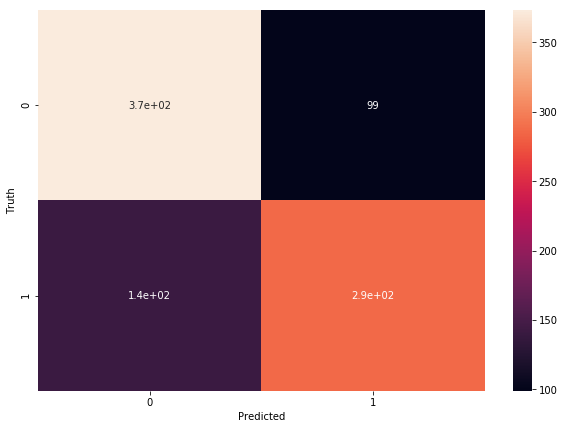

In [47]:
y_predicted2=RandomForest2.predict(X_test2)

from sklearn.metrics import confusion_matrix
confusionmatrix2= confusion_matrix(y_test2,y_predicted2)

import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(confusionmatrix2,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
#In the plot belw, 0 stands for DISORDERLY CONDUCT and 1 for DRIVER UNDER INFLUENCE 

As for the first confusion matrix, we can the ratio of success for the DISORDERLY CONDUCT is better than for DRIVING UNDER INFLUENCE.
Once again, those ratios correspond to the accurace of ~73% found above.

### Discuss how the model performance changes relative to the version with no weather data.


Surprisingly, the accuracy of the new model is very close to 73% once again. At first this might seem counter-intuitive since we have more criteria to classify the data, therefore the model should be more accurate.

However, after reflection, we can explain this by the fact that the pool of data was greatly reduced when merging with the weather dataframe. In fact, we only had the weather since 2012, where the crime records started in 2003. The merged dataframe was severely reduced to include only the dates for which we had a weather record. It was cut from 15 712, to 4498 entries.
This can explain why the accuracy remained the same:
- On one hand, more qualifying criteria increase the accuracy
- On the other hand, a reduced number of data, reduces the accuracy

**Resulting - per coincidence - in the same accuracy**

In [52]:
print(len(df2["Category"]))
print(len(result["Category"]))

15712
4498


### Discuss what you have learned about crime from including weather data in your model. 

We have learned that including weather data in the model can change the efficiency of classification. Indeed as written previously, the accuracy has virtually improved.
Moreover including new criteria allows us to add features in the decision trees to process information. The more features we have, more precise is the classification.

Finally we learned that adding features but forcing a reduction of datapoints, is not always profitable for a model.